In [ ]:
from model_utils import *
dataset = load_dataset('gt_db', crop=True, preprocess=False, limit=30)
binary_model = load_model(model_type='binary')

Scanning directory: gt_db
Found 0 valid images
Found 15 valid images
Found 30 valid images
Found 45 valid images
Found 60 valid images
Found 75 valid images
Found 90 valid images
Found 105 valid images
Found 120 valid images
Found 135 valid images
Found 150 valid images
Found 165 valid images
Found 180 valid images
Found 195 valid images
Found 210 valid images
Found 225 valid images
Found 240 valid images
Found 255 valid images
Found 270 valid images
Found 285 valid images
Found 300 valid images
Found 315 valid images
Found 330 valid images
Found 345 valid images
Found 360 valid images
Found 375 valid images
Found 390 valid images
Found 405 valid images
Found 420 valid images
Found 435 valid images
Found 450 valid images
Found 465 valid images
Found 480 valid images
Successfully loaded 480 images


In [17]:
images = dataset[:]
binary_str = "0100111110110100111110000111100010000000000100100110011010011011110110000110011101111001111001110001100011101000111111101000011"
binary_array = np.array([int(x) for x in binary_str])
def calculate_hamming_distance(hash1, hash2):
    return np.sum(hash1 != hash2)

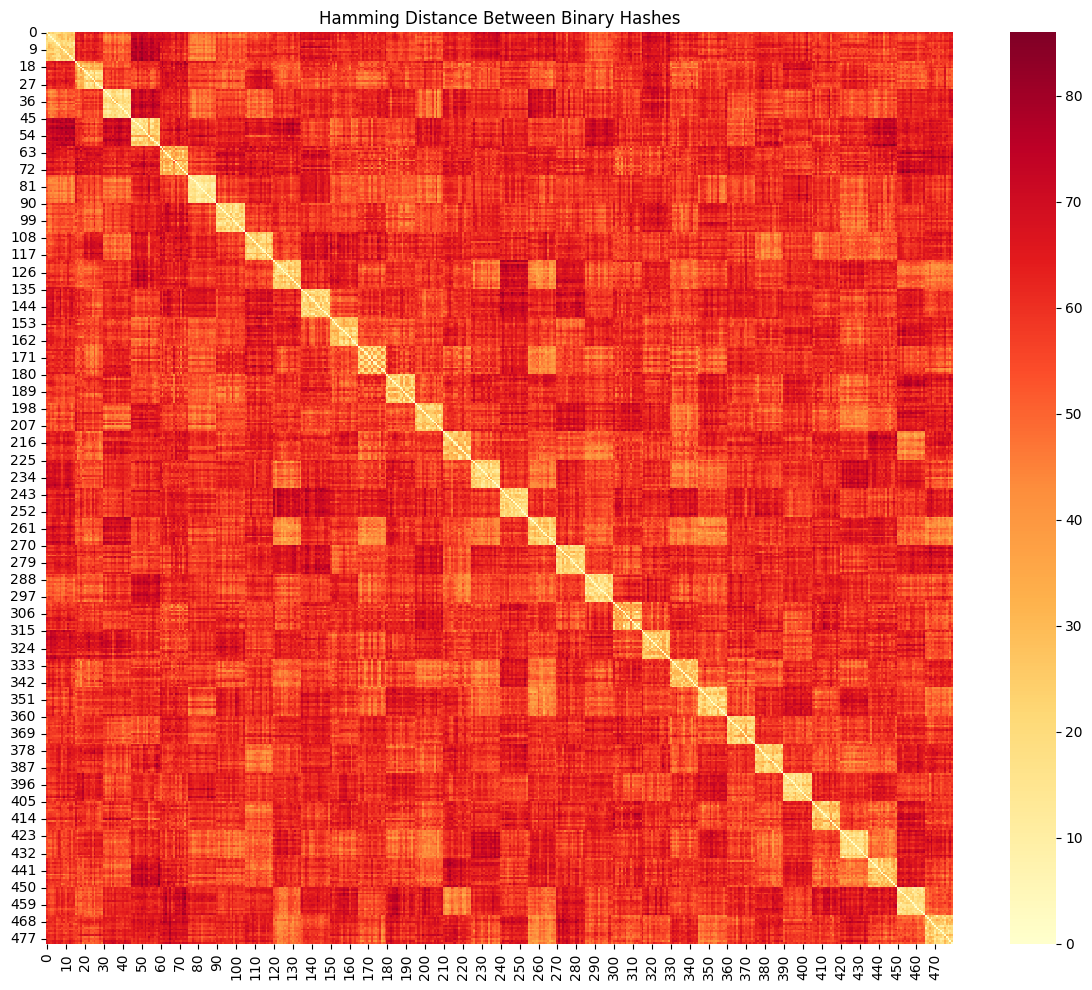

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get binary hashes
binary_hashes = []
for img in images:
    hash_vector = preprocess_and_predict(binary_model, [img])
    binary_hashes.append(hash_vector.flatten())

# Calculate distance matrix
n = len(binary_hashes)
distance_matrix = np.zeros((n, n))
# distance_matrix = np.zeros((n+1, n+1))

for i in range(n):
    for j in range(n):
        distance_matrix[i][j] = calculate_hamming_distance(binary_hashes[i], binary_hashes[j])

# for j in range(n):
#         distance_matrix[n][j] = calculate_hamming_distance(binary_array, binary_hashes[j])

# for i in range(n):
#         distance_matrix[i][n] = calculate_hamming_distance(binary_hashes[i], binary_array)


# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(distance_matrix, annot=False, cmap='YlOrRd', 
            # xticklabels=[f'img{i+1}' for i in range(n)],
            # yticklabels=[f'img{i+1}' for i in range(n)]
            )
plt.title('Hamming Distance Between Binary Hashes')
plt.tight_layout()
plt.show()